In [7]:
#%% Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#%% Set style and helper function

plt.style.use('classic')  # Use classic style instead of seaborn
# Add custom style configurations
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.grid': True,
    'grid.color': '#cccccc',
    'grid.alpha': 0.3,
    'axes.labelcolor': '#333333',
    'axes.titlecolor': '#333333',
    'font.family': 'sans-serif'
})

colors = ['#2c3e50', '#e74c3c', '#3498db', '#f1c40f', '#2ecc71']

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{val}\n({pct:.1f}%)'
    return my_autopct

In [9]:
#%% Load and prepare the data

df = pd.read_csv('../data/Cleaned_ElectionSurvey.csv')
df['Voted_Last_Election'] = df['Voted_Last_Election'].fillna('No Response')
df['Party_Belong'] = df['Party_Belong'].fillna('No Response')

In [10]:
pd.set_option('display.max_columns', None)
#%% Inspect the value counts of answers for each column and save each as a variable so I can preview it when I need it




Timestamp:
Timestamp
2024-12-27 13:53:00    6
2024-12-27 11:32:00    6
2024-12-28 11:35:00    6
2024-12-28 10:21:00    6
2024-12-28 10:34:00    6
                      ..
2024-12-30 21:03:00    1
2024-12-30 21:01:00    1
2024-12-30 20:59:00    1
2024-12-30 20:57:00    1
2024-12-30 20:54:00    1
Name: count, Length: 1772, dtype: int64

Age:
Age
19.0    138
23.0    135
32.0    129
25.0    104
18.0    100
       ... 
17.0      1
96.0      1
97.0      1
95.0      1
79.0      1
Name: count, Length: 71, dtype: int64

Occupation:
Occupation
Trader              410
Farmer              310
Farmer              295
Unknown             288
Trader              260
                   ... 
DJ                    1
Plumber               1
Engineer              1
Herbalist             1
Palm wine tapper      1
Name: count, Length: 222, dtype: int64

Voted_Last_Election:
Voted_Last_Election
Yes    2363
No     1091
Name: count, dtype: int64

Reason_Not_Voted:
Reason_Not_Voted
Not Specified                

In [12]:
# Set display options
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

# Load dataset
# df = pd.read_csv('data/ElectionSurvey.csv', encoding='latin1')

# Create dictionary to store value counts
value_counts_dict = {}

# Get value counts for each column and store in dictionary
for column in df.columns:
    value_counts_dict[column] = df[column].value_counts()

# Function to display value counts for a specific column
def show_counts(column_name):
    if column_name in value_counts_dict:
        print(f"\nValue counts for {column_name}:")
        print(value_counts_dict[column_name])
    else:
        print(f"No data found for column: {column_name}")

# Function to display missing values
def show_missing():
    missing_vals = df.isnull().sum()
    print("\nMissing values per column:")
    print(missing_vals[missing_vals > 0])

# Preview function usage
show_counts('Age')
show_counts('Party_Belong')
show_missing()

# Save value counts to CSV for reference
for column, counts in value_counts_dict.items():
    counts.to_csv(f'../data/value_counts_{column}.csv')


Value counts for Age:
Age
19.0    138
23.0    135
32.0    129
25.0    104
18.0    100
35.0     96
45.0     95
34.0     91
20.0     90
22.0     86
24.0     86
21.0     83
43.0     78
30.0     74
27.0     71
33.0     66
26.0     63
42.0     56
52.0     54
36.0     52
28.0     52
37.0     47
54.0     47
56.0     46
29.0     45
38.0     44
40.0     42
60.0     36
41.0     34
46.0     33
50.0     32
62.0     30
53.0     29
31.0     29
48.0     28
47.0     27
39.0     27
67.0     26
49.0     25
44.0     24
51.0     23
65.0     22
63.0     22
55.0     20
70.0     17
64.0     15
72.0     15
68.0     14
73.0     14
71.0     14
58.0     13
57.0     12
69.0     12
61.0     10
75.0      8
59.0      8
78.0      7
80.0      6
74.0      5
76.0      5
66.0      5
77.0      5
82.0      2
81.0      2
86.0      1
88.0      1
17.0      1
96.0      1
97.0      1
95.0      1
79.0      1
Name: count, dtype: int64

Value counts for Party_Belong:
Party_Belong
NDC                      1344
Not Specified       

In [ ]:
#%% Analyze voting patterns

voted_distribution = df['Voted_Last_Election'].value_counts()
print("\nVoting Distribution:")
print(voted_distribution)


Voting Distribution:
Voted_Last_Election
Yes    2363
No     1091
Name: count, dtype: int64


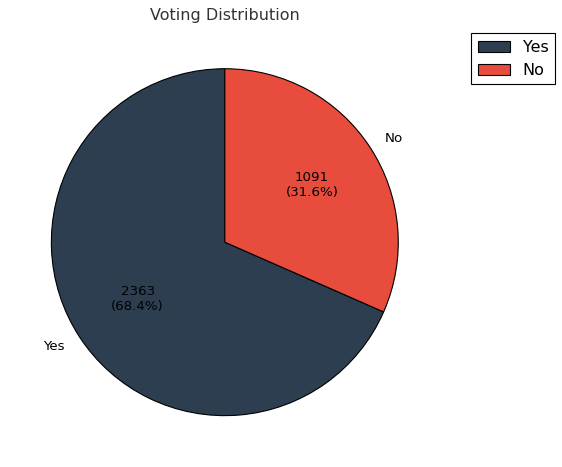

In [ ]:
#%% Visualize voting distribution

plt.figure(figsize=(10, 6))
plt.pie(voted_distribution, colors=colors,
        labels=voted_distribution.index,
        autopct=make_autopct(voted_distribution.values),
        startangle=90)
plt.title('Voting Distribution')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
#%% Analyze party affiliation

party_distribution = df['Party_Belong'].value_counts()
print("\nParty Affiliation Distribution:")
print(party_distribution)


Party Affiliation Distribution:
Party_Belong
NDC                      1344
Not Specified            1094
NPP                       846
None                      137
none                        6
N                           5
New force                   2
GUM                         2
 None                       2
Cpp                         2
CPP                         2
Can't tell                  1
Not a political fun         1
LPG(Kofi Apkaloo)           1
Cant tell                  1
Lack of team support        1
Both                        1
New Force                   1
I dont know                1
The New Force               1
The new force               1
Change                      1
CPP                         1
Name: count, dtype: int64


<ipython-input-9-916175d682a6>:9: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/justjosh/anaconda3/envs/minoenv/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/justjosh/anaconda3/envs/minoenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


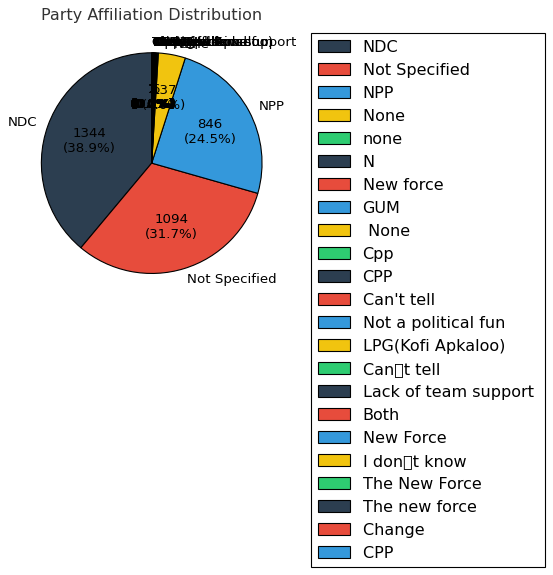

In [ ]:
#%% Visualize party affiliation

plt.figure(figsize=(10, 6))
plt.pie(party_distribution, colors=colors,
        labels=party_distribution.index,
        autopct=make_autopct(party_distribution.values),
        startangle=90)
plt.title('Party Affiliation Distribution')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
#%% Analyze reasons for NPP loss

reasons_npp_lost = df['Reason_NPP_Lost'].value_counts()
print("\nReasons for NPP Loss:")
print(reasons_npp_lost)


Reasons for NPP Loss:
Reason_NPP_Lost
Not Specified                                                                                             897
People were not happy with the NPP government and wanted change                                           834
He didnt do enough for the community                                                                     310
People were not happy with the NPP government and wanted change, He didnt do enough for the community    234
People were not happy with the NPP government and wanted change, People vote for NDC here                 158
                                                                                                         ... 
People were not happy with the NPP government and wanted change, People were not happy                      1
He didnt do enough for the community, The NDCs promises sounded better, People vote for NDC here          1
Delayed projects                                                                 

<ipython-input-11-c523727a2359>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=range(len(top_reasons)), y=top_reasons.values, palette=colors)
<ipython-input-11-c523727a2359>:19: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/justjosh/anaconda3/envs/minoenv/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/justjosh/anaconda3/envs/minoenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


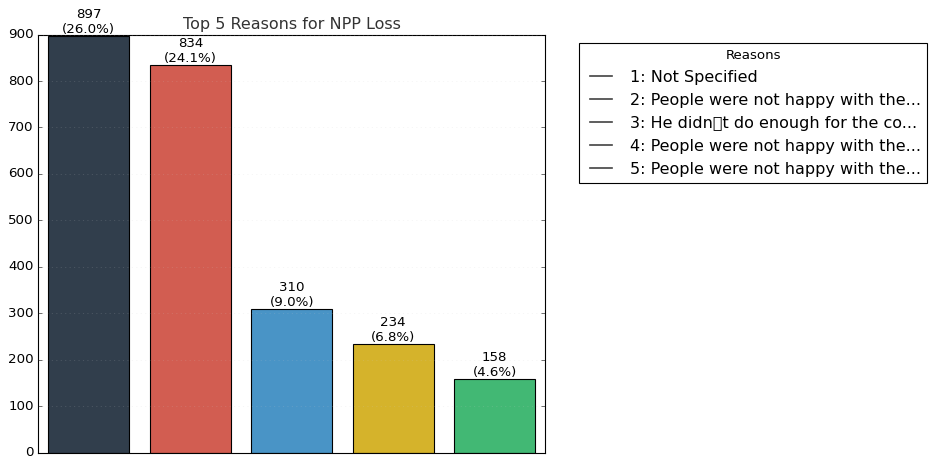

In [ ]:
#%% Visualize NPP loss reasons

plt.figure(figsize=(12, 6))
top_reasons = reasons_npp_lost.head(5)
ax = sns.barplot(x=range(len(top_reasons)), y=top_reasons.values, palette=colors)
plt.title('Top 5 Reasons for NPP Loss')
plt.xticks([])

# Add value labels on bars
for i, v in enumerate(top_reasons.values):
    percentage = (v/len(df))*100
    ax.text(i, v, f'{int(v)}\n({percentage:.1f}%)', 
            ha='center', va='bottom')

# Create legend
plt.legend(title='Reasons',
          labels=[f'{i+1}: {reason[:30]}...' if len(reason) > 30 else f'{i+1}: {reason}'
                 for i, reason in enumerate(top_reasons.index)],
          bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
#%% Analyze project awareness

project_awareness = df['Know_Projects'].value_counts()
print("\nProject Awareness Distribution:")
print(project_awareness)


Project Awareness Distribution:
Know_Projects
I heard, but they didn't help me                                      863
Not Specified                                                         808
No, I didn't know about them                                          671
Yes, I knew about them                                                656
Yes, I knew about them, I heard, but they didn't help me               50
                                                                     ... 
Yes, I knew about them, Boreholes, community center, CHP compound       1
Yes, I knew about them, Road                                            1
Yes, I knew about them, Street lights                                   1
Yes, I knew about them, Play ground                                     1
Yes, I knew about them, Hospital, schools                               1
Name: count, Length: 223, dtype: int64


<ipython-input-13-4390a27b9d4f>:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


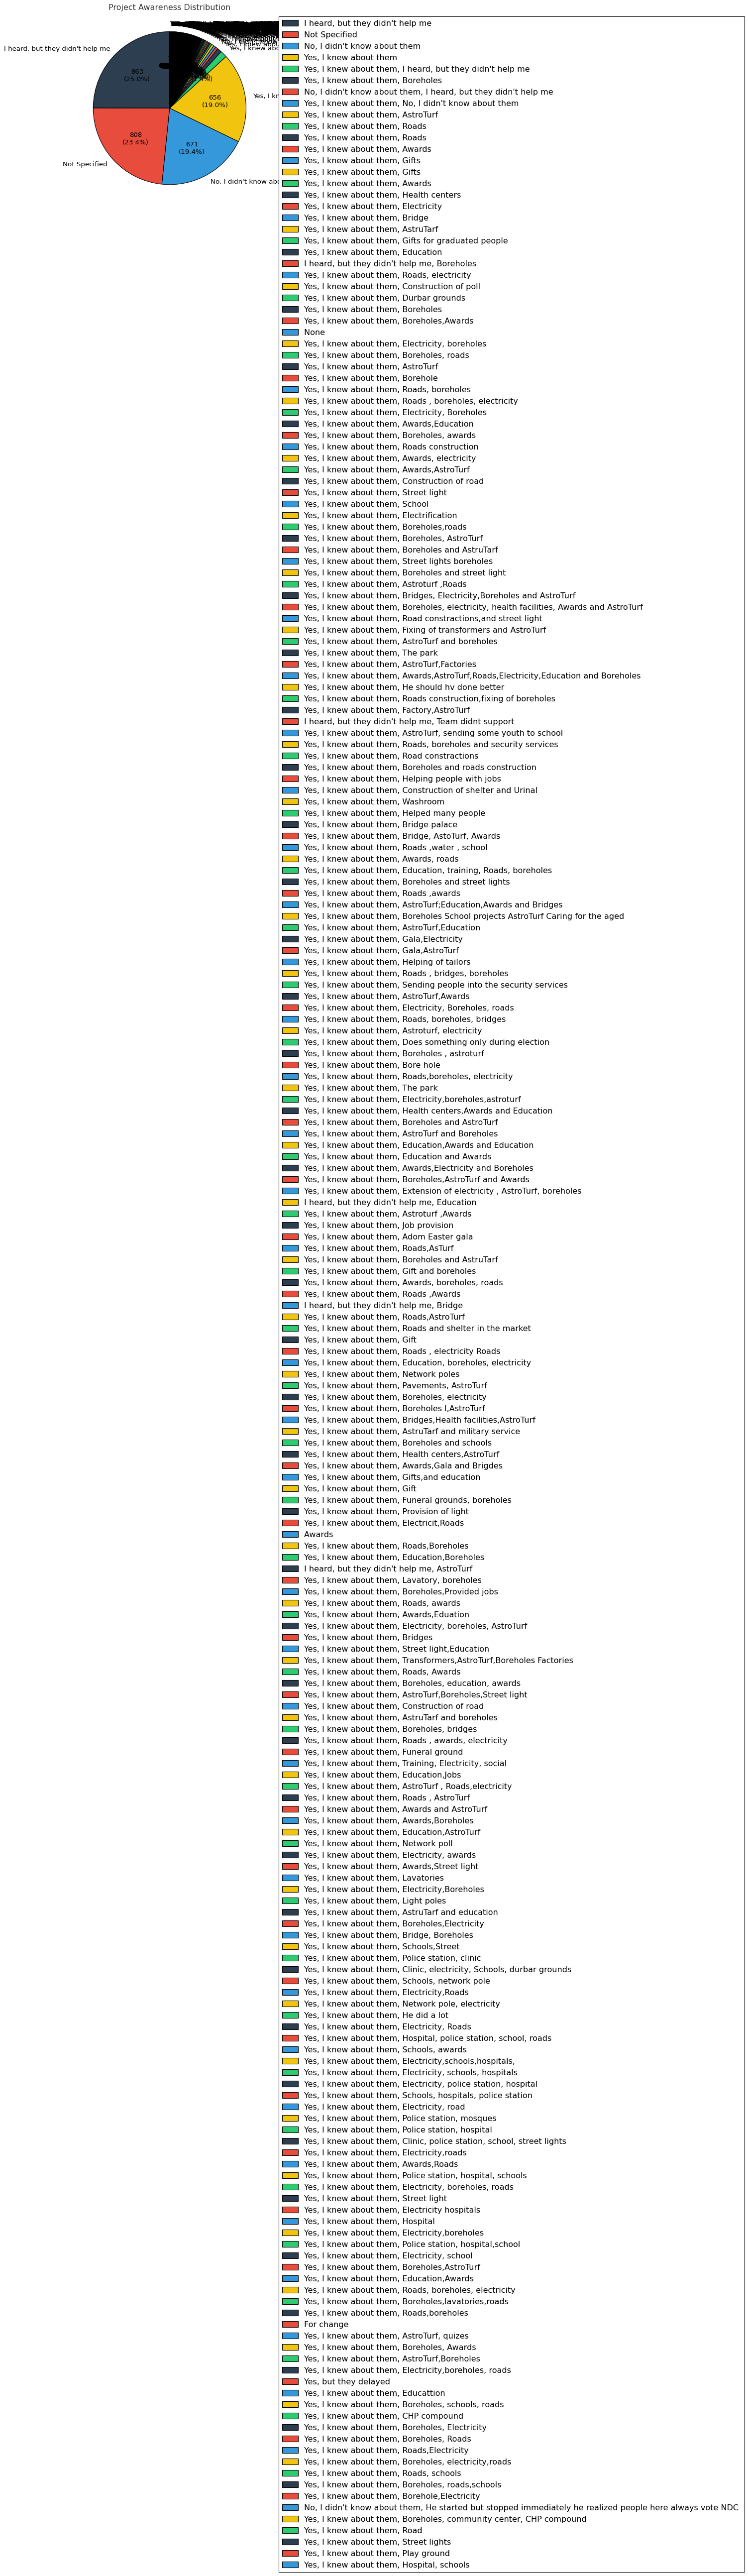

In [ ]:
#%% Visualize project awareness

plt.figure(figsize=(10, 6))
plt.pie(project_awareness, colors=colors,
        labels=project_awareness.index,
        autopct=make_autopct(project_awareness.values),
        startangle=90)
plt.title('Project Awareness Distribution')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
#%% Analyze community problem solving

problem_solving = df['Solved_Community_Problems'].value_counts()
print("\nCommunity Problem Solving Assessment:")
print(problem_solving)


Community Problem Solving Assessment:
Solved_Community_Problems
No, he didn't solve major issues       1000
Not Specified                           945
He tried, but it wasn't enough          810
Yes, he did most of the work needed     699
Name: count, dtype: int64


In [ ]:
#%% Analyze NDC's perceived advantages

ndc_better = df['NDC_Better_Than_NPP'].value_counts()
print("\nWhy NDC Was Perceived Better:")
print(ndc_better)


Why NDC Was Perceived Better:
NDC_Better_Than_NPP
Not Specified                                                       1142
They made stronger promises                                          777
They focused on key issues (farming, roads, schools)                 469
They were better at reaching people, They made stronger promises     350
They were better at reaching people                                  277
                                                                    ... 
People just like them                                                  1
People always vote NDC here pp                                         1
N                                                                      1
They made stronger promises, Change                                    1
Cha                                                                    1
Name: count, Length: 73, dtype: int64


<ipython-input-16-2c0c81f28685>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=range(len(top_advantages)), y=top_advantages.values, palette=colors)


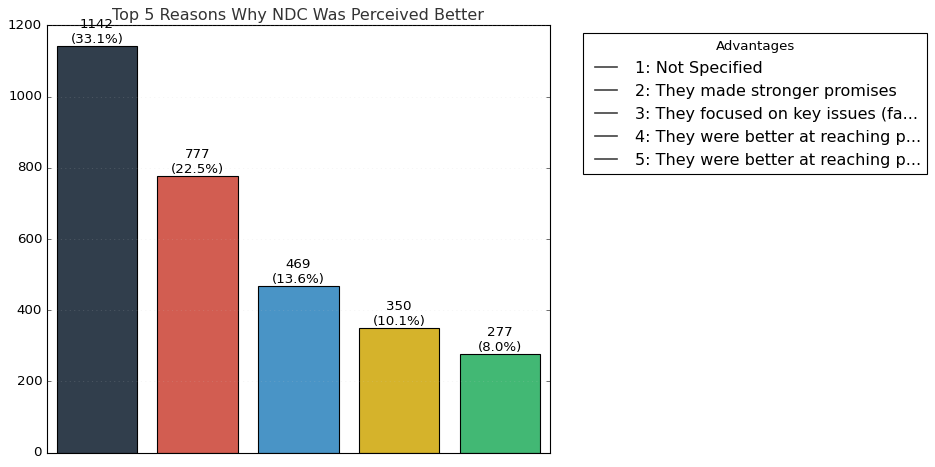

In [ ]:
#%% Visualize NDC advantages

plt.figure(figsize=(12, 6))
top_advantages = ndc_better.head(5)
ax = sns.barplot(x=range(len(top_advantages)), y=top_advantages.values, palette=colors)
plt.title('Top 5 Reasons Why NDC Was Perceived Better')
plt.xticks([])

# Add value labels on bars
for i, v in enumerate(top_advantages.values):
    percentage = (v/len(df))*100
    ax.text(i, v, f'{int(v)}\n({percentage:.1f}%)', 
            ha='center', va='bottom')

# Create legend
plt.legend(title='Advantages',
          labels=[f'{i+1}: {adv[:30]}...' if len(adv) > 30 else f'{i+1}: {adv}'
                 for i, adv in enumerate(top_advantages.index)],
          bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [ ]:
#%% Create a summary of key findings

print("\nKEY FINDINGS:")
print("1. Voting Participation Rate:", 
      (voted_distribution['Yes'] / voted_distribution.sum() * 100).round(2), "%")

party_support = df[df['Party_Belong'].isin(['NPP', 'NDC'])]['Party_Belong'].value_counts()
print("2. Party Support Ratio (NDC:NPP):", 
      (party_support['NDC'] / party_support['NPP']).round(2))

top_reason = reasons_npp_lost.index[0]
print("3. Main Reason for NPP Loss:", top_reason)

project_awareness_rate = (
    df[df['Know_Projects'].str.contains('Yes', na=False)].shape[0] / 
    df['Know_Projects'].notna().sum() * 100
).round(2)
print("4. Project Awareness Rate:", project_awareness_rate, "%")


KEY FINDINGS:
1. Voting Participation Rate: 68.41 %
2. Party Support Ratio (NDC:NPP): 1.59
3. Main Reason for NPP Loss: Not Specified
4. Project Awareness Rate: 31.3 %
